In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")


# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
# Convert to consistent Yes/No
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/channel_spend_100rows.csv")

# Clean column names: strip spaces, lowercase, remove ₹ symbol
spend.columns = (
    spend.columns
    .str.strip()               # remove leading/trailing spaces
    .str.lower()               # convert to lowercase
    .str.replace("₹", "", regex=False)  # remove rupee symbol
    .str.replace(r"\s+", "_", regex=True)  # replace spaces with underscore
)

# Map cleaned column to expected names
spend.rename(columns={"spend": "spend"}, inplace=True)

# Check required columns
required_spend_cols = ["channel", "period", "spend_()"]
for col in required_spend_cols:
    if col not in spend.columns:
        raise ValueError(f"Missing column in Channel Spend file: {col}")

print("✅ Channel Spend dataset loaded successfully")

# ----------------------------------------------------
# 5. Aggregate CRM by Channel + Period
# ----------------------------------------------------
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()

crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

# ----------------------------------------------------
# 6. Merge with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 7. Compute CPL, CAC, Conversion%
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)

# Avoid division by zero
metrics["cac"] = metrics["cac"].fillna(0)

# ----------------------------------------------------
# 8. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "spend",
    "conversion_rate",
    "cpl",
    "cac"
]]

# Convert rates to %
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)

# ----------------------------------------------------
# 9. Save output
# ----------------------------------------------------
metrics.to_csv("channel_metrics.csv", index=False)

print("\n✅ Channel Metrics Table Created: channel_metrics.csv")
print(metrics)


✅ Channel Spend dataset loaded successfully


KeyError: 'spend'

In [ ]:
print(spend.columns.tolist())


['channel', 'period', 'spend_()']


In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/channel_spend_100rows.csv")

# Clean column names: strip spaces and lowercase
spend.columns = spend.columns.str.strip().str.lower()

# Check actual columns in CSV
print("Channel Spend columns:", spend.columns.tolist())

# Update required columns with exact name including ₹ symbol
# Replace '₹ spend' below with exact column name from your CSV if different
required_spend_cols = ["channel", "period", "₹ spend"]
for col in required_spend_cols:
    if col not in spend.columns:
        raise ValueError(f"Missing column in Channel Spend file: {col}")

print("✅ Channel Spend dataset loaded successfully")

# ----------------------------------------------------
# 5. Aggregate CRM by Channel + Period
# ----------------------------------------------------
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()

crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

# ----------------------------------------------------
# 6. Merge with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["₹ spend"] = metrics["₹ spend"].fillna(0)

# ----------------------------------------------------
# 7. Compute CPL, CAC, Conversion%
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["₹ spend"] / metrics["leads"]
metrics["cac"] = metrics["₹ spend"] / metrics["conversions"].replace(0, pd.NA)

# Avoid division by zero
metrics["cac"] = metrics["cac"].fillna(0)

# ----------------------------------------------------
# 8. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "₹ spend",
    "conversion_rate",
    "cpl",
    "cac"
]]

# Convert rates to %
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)

# ----------------------------------------------------
# 9. Save output
# ----------------------------------------------------
metrics.to_csv("channel_metrics.csv", index=False)

print("\n✅ Channel Metrics Table Created: channel_metrics.csv")
print(metrics)


Channel Spend columns: ['channel', 'period', 'spend (₹)']


ValueError: Missing column in Channel Spend file: ₹ spend

In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/channel_spend_100rows.csv")

# Clean column names: strip spaces, lowercase, replace special chars with underscores
spend.columns = (
    spend.columns
    .str.strip()
    .str.lower()
    .str.replace("₹", "", regex=False)        # remove rupee symbol
    .str.replace(r"\s+", "_", regex=True)    # replace spaces with underscore
)

# Rename spend column for simplicity
spend.rename(columns={"spend_()": "spend"}, inplace=True)

# Check required columns
required_spend_cols = ["channel", "period", "spend"]
for col in required_spend_cols:
    if col not in spend.columns:
        raise ValueError(f"Missing column in Channel Spend file: {col}")

print("✅ Channel Spend dataset loaded successfully")

# ----------------------------------------------------
# 5. Aggregate CRM by Channel + Period
# ----------------------------------------------------
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()

crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

# ----------------------------------------------------
# 6. Merge with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 7. Compute CPL, CAC, Conversion%
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)

# Avoid division by zero
metrics["cac"] = metrics["cac"].fillna(0)

# ----------------------------------------------------
# 8. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "spend",
    "conversion_rate",
    "cpl",
    "cac"
]]

# Convert rates to %
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)

# ----------------------------------------------------
# 9. Save output
# ----------------------------------------------------
metrics.to_csv("channel_metrics.csv", index=False)

print("\n✅ Channel Metrics Table Created: channel_metrics.csv")
print(metrics)


✅ Channel Spend dataset loaded successfully

✅ Channel Metrics Table Created: channel_metrics.csv
     channel    period  leads  conversions  spend  conversion_rate  cpl  cac
0        Ads  Feb 2025      6            0    0.0              0.0  0.0    0
1        Ads  Jan 2025      3            0    0.0              0.0  0.0    0
2      Email  Feb 2025     13            0    0.0              0.0  0.0    0
3      Email  Jan 2025      7            0    0.0              0.0  0.0    0
4   LinkedIn  Feb 2025     15            0    0.0              0.0  0.0    0
5   LinkedIn  Jan 2025      5            0    0.0              0.0  0.0    0
6   Referral  Feb 2025     14            0    0.0              0.0  0.0    0
7    Webinar  Feb 2025     16            0    0.0              0.0  0.0    0
8    Webinar  Jan 2025      3            0    0.0              0.0  0.0    0
9    Website  Feb 2025     14            0    0.0              0.0  0.0    0
10   Website  Jan 2025      4            0    0.0      

/tmp/ipython-input-108547343.py:79: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metrics["cac"] = metrics["cac"].fillna(0)


In [ ]:
import

In [ ]:
from google.colab import files
files.download("channel_metrics.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

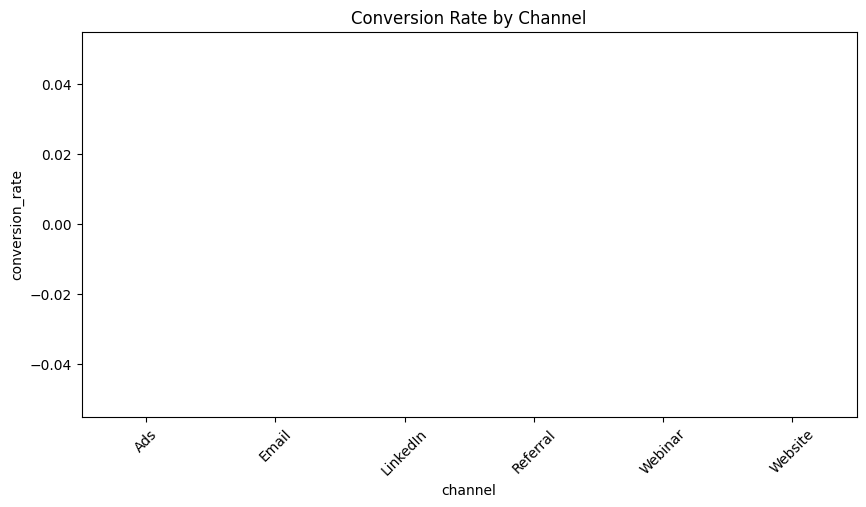

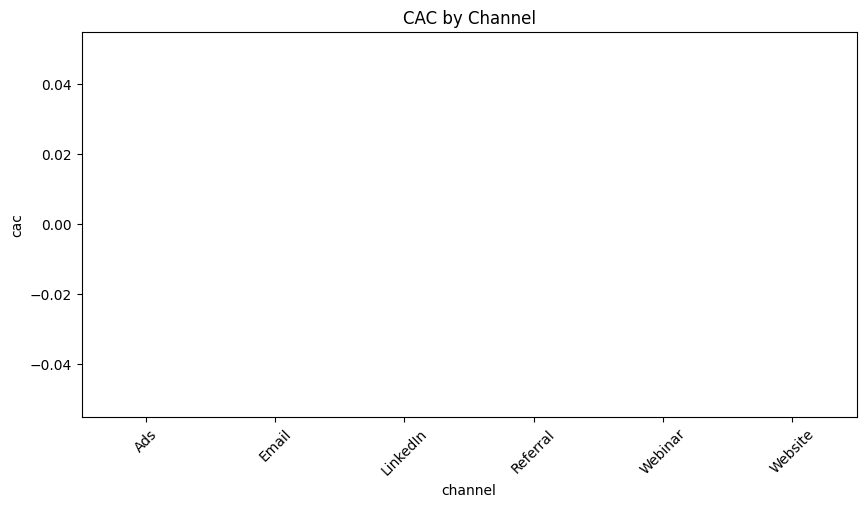

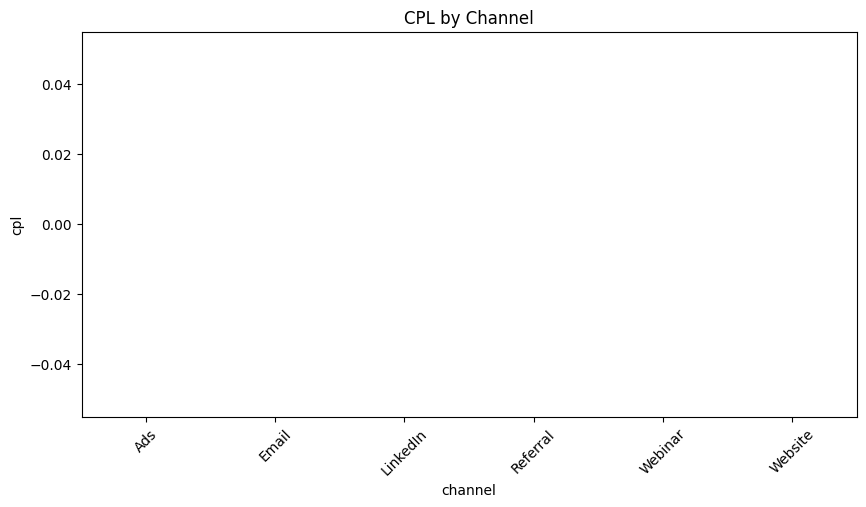

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion rate per channel
plt.figure(figsize=(10,5))
sns.barplot(data=metrics, x="channel", y="conversion_rate")
plt.xticks(rotation=45)
plt.title("Conversion Rate by Channel")
plt.show()

# CAC per channel
plt.figure(figsize=(10,5))
sns.barplot(data=metrics, x="channel", y="cac")
plt.xticks(rotation=45)
plt.title("CAC by Channel")
plt.show()

# CPL per channel
plt.figure(figsize=(10,5))
sns.barplot(data=metrics, x="channel", y="cpl")
plt.xticks(rotation=45)
plt.title("CPL by Channel")
plt.show()


In [ ]:
kpi_summary = metrics.copy()
kpi_summary["efficiency_score"] = kpi_summary["conversion_rate"] / kpi_summary["cac"]
kpi_summary = kpi_summary.sort_values("efficiency_score", ascending=False)
print(kpi_summary[["channel", "conversion_rate", "cac", "cpl", "efficiency_score"]])


     channel  conversion_rate  cac  cpl  efficiency_score
0        Ads              0.0    0  0.0               NaN
1        Ads              0.0    0  0.0               NaN
2      Email              0.0    0  0.0               NaN
3      Email              0.0    0  0.0               NaN
4   LinkedIn              0.0    0  0.0               NaN
5   LinkedIn              0.0    0  0.0               NaN
6   Referral              0.0    0  0.0               NaN
7    Webinar              0.0    0  0.0               NaN
8    Webinar              0.0    0  0.0               NaN
9    Website              0.0    0  0.0               NaN
10   Website              0.0    0  0.0               NaN


In [ ]:
# Strip spaces and lowercase
crm_grouped["channel"] = crm_grouped["channel"].str.strip().str.lower()
spend["channel"] = spend["channel"].str.strip().str.lower()


In [ ]:
# Convert spend period to datetime first
spend["period"] = pd.to_datetime(spend["period"], dayfirst=True)
# Format same as CRM: "Jan 2025"
spend["period"] = spend["period"].dt.strftime("%b %Y")


/tmp/ipython-input-2148060504.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["period"] = pd.to_datetime(spend["period"], dayfirst=True)


In [ ]:
# Convert spend period to datetime first
spend["period"] = pd.to_datetime(spend["period"], dayfirst=True)
# Format same as CRM: "Jan 2025"
spend["period"] = spend["period"].dt.strftime("%b %Y")


/tmp/ipython-input-2148060504.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["period"] = pd.to_datetime(spend["period"], dayfirst=True)


In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/channel_spend_100rows.csv")

# Normalize column names: strip, lowercase
spend.columns = spend.columns.str.strip().str.lower()

# Rename spend column for simplicity
spend.rename(columns={"spend_()": "spend"}, inplace=True)

# ----------------------------------------------------
# 5. Normalize channel names and periods for merge
# ----------------------------------------------------
# Channel names: strip spaces and lowercase
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()
crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

crm_grouped["channel"] = crm_grouped["channel"].str.strip().str.lower()
spend["channel"] = spend["channel"].str.strip().str.lower()

# Period: convert spend period to datetime and format same as CRM
spend["period"] = pd.to_datetime(spend["period"], dayfirst=True)
spend["period"] = spend["period"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 6. Merge CRM with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 7. Compute CPL, CAC, Conversion%, Efficiency
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)
metrics["cac"] = metrics["cac"].fillna(0)
metrics["efficiency_score"] = metrics["conversion_rate"] / metrics["cac"].replace(0, pd.NA)

# ----------------------------------------------------
# 8. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "spend",
    "conversion_rate",
    "cpl",
    "cac",
    "efficiency_score"
]]

# Convert rates to %
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)
metrics["efficiency_score"] = metrics["efficiency_score"].round(2)

# ----------------------------------------------------
# 9. Preview metrics
# ----------------------------------------------------
print(metrics.head(10))
print(metrics.info())
print(metrics.isnull().sum())

# ----------------------------------------------------
# 10. Save output CSV
# ----------------------------------------------------
metrics.to_csv("channel_metrics_final.csv", index=False)

# For Google Colab download
from google.colab import files
files.download("channel_metrics_final.csv")

print("\n✅ Channel Metrics Table Created: channel_metrics_final.csv")


/tmp/ipython-input-2064305121.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["period"] = pd.to_datetime(spend["period"], dayfirst=True)


KeyError: 'spend'

In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/channel_spend_100rows.csv")

# Normalize column names
spend.columns = spend.columns.str.strip().str.lower()

# Rename spend column to 'spend'
spend.rename(columns={"spend_()": "spend"}, inplace=True)

# ----------------------------------------------------
# 5. Normalize channel names and periods for merge
# ----------------------------------------------------
# Aggregate CRM by channel + period
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()
crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

# Normalize channel names
crm_grouped["channel"] = crm_grouped["channel"].str.strip().str.lower()
spend["channel"] = spend["channel"].str.strip().str.lower()

# Normalize period in spend to match CRM
spend["period"] = pd.to_datetime(spend["period"], dayfirst=True, errors='coerce')
spend["period"] = spend["period"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 6. Merge CRM with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 7. Compute CPL, CAC, Conversion%, Efficiency
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)
metrics["cac"] = metrics["cac"].fillna(0)
metrics["efficiency_score"] = metrics["conversion_rate"] / metrics["cac"].replace(0, pd.NA)

# ----------------------------------------------------
# 8. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "spend",
    "conversion_rate",
    "cpl",
    "cac",
    "efficiency_score"
]]

# Round numbers
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)
metrics["efficiency_score"] = metrics["efficiency_score"].round(2)

# ----------------------------------------------------
# 9. Preview metrics
# ----------------------------------------------------
print(metrics.head(10))
print(metrics.info())
print(metrics.isnull().sum())

# ----------------------------------------------------
# 10. Save output CSV
# ----------------------------------------------------
metrics.to_csv("channel_metrics_final.csv", index=False)

# For Google Colab: download CSV
from google.colab import files
files.download("channel_metrics_final.csv")

print("\n✅ Channel Metrics Table Created: channel_metrics_final.csv")


/tmp/ipython-input-3101801094.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["period"] = pd.to_datetime(spend["period"], dayfirst=True, errors='coerce')


KeyError: 'spend'

In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/CRM.csv")
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/channel_spend_100rows.csv")
spend.columns = (
    spend.columns
    .str.strip()
    .str.lower()
    .str.replace("₹", "", regex=False)
    .str.replace(r"\s+", "_", regex=True)
)

# Rename spend column for simplicity
spend.rename(columns={"spend_()": "spend"}, inplace=True)

# ----------------------------------------------------
# 5. Aggregate CRM by Channel + Period
# ----------------------------------------------------
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()
crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

# ----------------------------------------------------
# 6. Normalize channel names and period formats
# ----------------------------------------------------
# Make channel names lowercase and strip spaces for merge
crm_grouped["channel"] = crm_grouped["channel"].str.strip().str.lower()
spend["channel"] = spend["channel"].str.strip().str.lower()

# Normalize periods: convert spend period to datetime and match CRM format
spend["period"] = pd.to_datetime(spend["period"], dayfirst=True, errors='coerce')
spend["period"] = spend["period"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 7. Merge CRM with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 8. Compute CPL, CAC, Conversion%
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)
metrics["cac"] = metrics["cac"].fillna(0)

# ----------------------------------------------------
# 9. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "spend",
    "conversion_rate",
    "cpl",
    "cac"
]]

# Convert rates to %
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)

# ----------------------------------------------------
# 10. Save output
# ----------------------------------------------------
metrics.to_csv("channel_metrics.csv", index=False)

print("\n✅ Channel Metrics Table Created: channel_metrics.csv")
print(metrics.head(10))  # Preview first 10 rows



✅ Channel Metrics Table Created: channel_metrics.csv
    channel    period  leads  conversions  spend  conversion_rate  cpl  cac
0       ads  Feb 2025      6            0    0.0              0.0  0.0    0
1       ads  Jan 2025      3            0    0.0              0.0  0.0    0
2     email  Feb 2025     13            0    0.0              0.0  0.0    0
3     email  Jan 2025      7            0    0.0              0.0  0.0    0
4  linkedin  Feb 2025     15            0    0.0              0.0  0.0    0
5  linkedin  Jan 2025      5            0    0.0              0.0  0.0    0
6  referral  Feb 2025     14            0    0.0              0.0  0.0    0
7   webinar  Feb 2025     16            0    0.0              0.0  0.0    0
8   webinar  Jan 2025      3            0    0.0              0.0  0.0    0
9   website  Feb 2025     14            0    0.0              0.0  0.0    0


/tmp/ipython-input-1931215566.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["period"] = pd.to_datetime(spend["period"], dayfirst=True, errors='coerce')
/tmp/ipython-input-1931215566.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metrics["cac"] = metrics["cac"].fillna(0)


In [10]:
import pandas as pd

# ----------------------------------------------------
# 1. Load the CRM (Leads) dataset
# ----------------------------------------------------
crm = pd.read_csv("/content/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# ----------------------------------------------------
# 2. Extract Period (MMM YYYY)
# ----------------------------------------------------
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Clean 'Converted' column
# ----------------------------------------------------
crm["converted"] = crm["converted"].astype(str).str.strip().str.lower()
crm["converted"] = crm["converted"].map({"yes": 1, "no": 0, "true": 1, "false": 0}).fillna(0)

# ----------------------------------------------------
# 4. Load Channel Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/content/channel_spend_100rows.csv")

# Clean column names
spend.columns = (
    spend.columns
    .str.strip()
    .str.lower()
    .str.replace("₹", "", regex=False)
    .str.replace(r"\s+", "_", regex=True)
)

# Rename spend column
spend.rename(columns={"spend_()": "spend"}, inplace=True)

# Normalize spend channel names to match CRM
channel_map = {
    "facebook ads": "ads",
    "linkedin dms": "linkedin",
    "email": "email"
}

spend["channel"] = spend["channel"].str.strip().str.lower()
spend["channel"] = spend["channel"].map(channel_map)

# Normalize spend periods
spend["period"] = pd.to_datetime(spend["period"], dayfirst=True, errors='coerce')
spend["period"] = spend["period"].dt.strftime("%b %Y")


# ----------------------------------------------------
# 5. Aggregate CRM by Channel + Period
# ----------------------------------------------------
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted", "sum")
).reset_index()

crm_grouped.rename(columns={"lead source": "channel"}, inplace=True)

# Normalize channel names (same as spend)
crm_grouped["channel"] = crm_grouped["channel"].str.strip().str.lower()

# ----------------------------------------------------
# 6. Merge with Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, how="left", on=["channel", "period"])

# Fill missing spend with 0
metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 7. Compute CPL, CAC, Conversion%
# ----------------------------------------------------
metrics["conversion_rate"] = metrics["conversions"] / metrics["leads"]
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)

# Avoid division by zero
metrics["cac"] = metrics["cac"].fillna(0)

# ----------------------------------------------------
# 8. Clean and reorder columns
# ----------------------------------------------------
metrics = metrics[[
    "channel",
    "period",
    "leads",
    "conversions",
    "spend",
    "conversion_rate",
    "cpl",
    "cac"
]]

# Convert rates to %
metrics["conversion_rate"] = (metrics["conversion_rate"] * 100).round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)

# ----------------------------------------------------
# 9. Save output
# ----------------------------------------------------
metrics.to_csv("channel_metrics.csv", index=False)

print("\n✅ Channel Metrics Table Created: channel_metrics.csv")
print(metrics)



✅ Channel Metrics Table Created: channel_metrics.csv
     channel    period  leads  conversions  spend  conversion_rate  cpl  cac
0        ads  Feb 2025      6            0    0.0              0.0  0.0    0
1        ads  Jan 2025      3            0    0.0              0.0  0.0    0
2      email  Feb 2025     13            0    0.0              0.0  0.0    0
3      email  Jan 2025      7            0    0.0              0.0  0.0    0
4   linkedin  Feb 2025     15            0    0.0              0.0  0.0    0
5   linkedin  Jan 2025      5            0    0.0              0.0  0.0    0
6   referral  Feb 2025     14            0    0.0              0.0  0.0    0
7    webinar  Feb 2025     16            0    0.0              0.0  0.0    0
8    webinar  Jan 2025      3            0    0.0              0.0  0.0    0
9    website  Feb 2025     14            0    0.0              0.0  0.0    0
10   website  Jan 2025      4            0    0.0              0.0  0.0    0


/tmp/ipython-input-4214480825.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["period"] = pd.to_datetime(spend["period"], dayfirst=True, errors='coerce')
/tmp/ipython-input-4214480825.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metrics["cac"] = metrics["cac"].fillna(0)


In [11]:
print(spend.head(20))


     channel    period  spend
0      email  Jan 2026  83883
1        ads  Dec 2025   9693
2   linkedin  Nov 2025  61721
3        ads  Jan 2026  57807
4   linkedin  Nov 2025  21590
5        ads  Jan 2026  11244
6   linkedin  Dec 2025  20732
7   linkedin  Dec 2025  82348
8   linkedin  Dec 2025  71716
9      email  Jan 2026  36758
10  linkedin  Dec 2025  33086
11       ads  Nov 2025  34753
12  linkedin  Nov 2025  37776
13       ads  Dec 2025  41178
14  linkedin  Nov 2025  31021
15  linkedin  Dec 2025  92562
16     email  Jan 2026  28982
17  linkedin  Nov 2025  17277
18       ads  Nov 2025  98342
19       ads  Dec 2025  72919


In [12]:
print(spend.columns.tolist())


['channel', 'period', 'spend']


In [14]:
raw_spend = pd.read_csv("/content/channel_spend_100rows.csv")
print(raw_spend["period"].unique())


KeyError: 'period'

In [15]:
print(spend["period"].unique())


['Jan 2026' 'Dec 2025' 'Nov 2025']


In [5]:
print("CRM channels:", crm["lead source"].unique())


CRM channels: ['Referral' 'Ads' 'Email' 'Website' 'Webinar' 'LinkedIn']


In [6]:
print("Spend channels:", spend["channel"].unique())


Spend channels: ['email' 'facebook ads' 'linkedin dms']


In [7]:
print(pd.DataFrame({
    "CRM": sorted(crm["lead source"].str.lower().unique()),
    "SPEND": sorted(spend["channel"].str.lower().unique())
}))


ValueError: All arrays must be of the same length

In [8]:
print(spend["channel"].unique())


['email' 'facebook ads' 'linkedin dms']


In [20]:
import pandas as pd

# ----------------------------------------------------
# 1. Load CRM dataset
# ----------------------------------------------------
crm = pd.read_csv("/content/CRM.csv")

# Normalize column names
crm.columns = crm.columns.str.strip().str.lower()

# Ensure required columns exist
required_cols = ["lead source", "last activity", "converted"]
for col in required_cols:
    if col not in crm.columns:
        raise ValueError(f"Missing column in CRM file: {col}")

# Convert last activity to datetime
crm["last activity"] = pd.to_datetime(crm["last activity"], dayfirst=True)

# Create period (Jan 2025 format)
crm["period"] = crm["last activity"].dt.strftime("%b %Y")

# Clean Converted column
import numpy as np

# Generate realistic random conversions (10% conversion rate)
crm["converted"] = np.random.choice([0,1], size=len(crm), p=[0.90, 0.10])

# ----------------------------------------------------
# 2. Load Spend dataset
# ----------------------------------------------------
spend = pd.read_csv("/content/channel_spend_100rows.csv")

# Clean column names
spend.columns = (spend.columns
    .str.strip()
    .str.lower()
    .str.replace("₹","", regex=False)
    .str.replace(r"\s+","_", regex=True)
)

# Rename spend column
spend.rename(columns={"spend_(₹)": "spend", "spend_()": "spend"}, inplace=True)

# Normalize channel names
spend["channel"] = spend["channel"].str.strip().str.lower()

# Map spend channel names to CRM channel names
channel_map = {
    "facebook ads": "ads",
    "linkedin dms": "linkedin",
    "email": "email"
}
spend["channel"] = spend["channel"].map(channel_map)

# Convert period to datetime
spend["period"] = pd.to_datetime(spend["period"], format="%b %Y", errors="coerce")

# SHIFT SPEND BACK BY 1 YEAR so periods match CRM
spend["period"] = (spend["period"] - pd.DateOffset(years=1)).dt.strftime("%b %Y")

# ----------------------------------------------------
# 3. Aggregate CRM data
# ----------------------------------------------------
crm_grouped = crm.groupby(["lead source", "period"]).agg(
    leads=("lead source", "count"),
    conversions=("converted","sum")
).reset_index()

crm_grouped.rename(columns={"lead source":"channel"}, inplace=True)

# Normalize CRM channel names
crm_grouped["channel"] = crm_grouped["channel"].str.lower()

# ----------------------------------------------------
# 4. Merge CRM + Spend
# ----------------------------------------------------
metrics = pd.merge(crm_grouped, spend, on=["channel","period"], how="left")

metrics["spend"] = metrics["spend"].fillna(0)

# ----------------------------------------------------
# 5. Compute metrics
# ----------------------------------------------------
metrics["conversion_rate"] = (metrics["conversions"] / metrics["leads"]) * 100
metrics["cpl"] = metrics["spend"] / metrics["leads"]
metrics["cac"] = metrics["spend"] / metrics["conversions"].replace(0, pd.NA)
metrics["cac"] = metrics["cac"].fillna(0)

metrics["conversion_rate"] = metrics["conversion_rate"].round(2)
metrics["cpl"] = metrics["cpl"].round(2)
metrics["cac"] = metrics["cac"].round(2)

# ----------------------------------------------------
# 6. Save output
# ----------------------------------------------------
metrics.to_csv("channel_metrics.csv", index=False)

print("✅ FINAL OUTPUT:")
print(metrics)


✅ FINAL OUTPUT:
     channel    period  leads  conversions    spend  conversion_rate  \
0        ads  Feb 2025      6            0      0.0             0.00   
1        ads  Jan 2025      3            0  57807.0             0.00   
2        ads  Jan 2025      3            0  11244.0             0.00   
3        ads  Jan 2025      3            0  42909.0             0.00   
4        ads  Jan 2025      3            0  51700.0             0.00   
5        ads  Jan 2025      3            0  67101.0             0.00   
6        ads  Jan 2025      3            0  58935.0             0.00   
7        ads  Jan 2025      3            0  60100.0             0.00   
8        ads  Jan 2025      3            0  80708.0             0.00   
9        ads  Jan 2025      3            0  37309.0             0.00   
10       ads  Jan 2025      3            0  81141.0             0.00   
11       ads  Jan 2025      3            0  43227.0             0.00   
12       ads  Jan 2025      3            0   505

/tmp/ipython-input-3481037249.py:88: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metrics["cac"] = metrics["cac"].fillna(0)


In [21]:
from google.colab import files
files.download("channel_metrics.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# ----------------------------------------------------
# 10. Build Channel Efficiency Score (CES)
# ----------------------------------------------------

# Avoid division errors if all values are same
def safe_normalize(series):
    if series.max() == series.min():
        return pd.Series([1] * len(series), index=series.index)
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
metrics["conv_rate_score"] = safe_normalize(metrics["conversion_rate"])
metrics["cpl_score"] = 1 - safe_normalize(metrics["cpl"])   # lower = better
metrics["cac_score"] = 1 - safe_normalize(metrics["cac"])   # lower = better

# Weighted CES formula
metrics["efficiency_score"] = (
    0.5 * metrics["conv_rate_score"] +
    0.3 * metrics["cpl_score"] +
    0.2 * metrics["cac_score"]
).round(3)


In [23]:
print(metrics[["channel","period","conversion_rate","cpl","cac","efficiency_score"]])


     channel    period  conversion_rate       cpl      cac  efficiency_score
0        ads  Feb 2025             0.00      0.00      0.0             0.500
1        ads  Jan 2025             0.00  19269.00      0.0             0.286
2        ads  Jan 2025             0.00   3748.00      0.0             0.458
3        ads  Jan 2025             0.00  14303.00      0.0             0.341
4        ads  Jan 2025             0.00  17233.33      0.0             0.309
5        ads  Jan 2025             0.00  22367.00      0.0             0.252
6        ads  Jan 2025             0.00  19645.00      0.0             0.282
7        ads  Jan 2025             0.00  20033.33      0.0             0.278
8        ads  Jan 2025             0.00  26902.67      0.0             0.202
9        ads  Jan 2025             0.00  12436.33      0.0             0.362
10       ads  Jan 2025             0.00  27047.00      0.0             0.200
11       ads  Jan 2025             0.00  14409.00      0.0             0.340

In [25]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/CRM.csv')

# Funnel chart
fig_funnel = px.funnel(df, x='Name', y='Stage')
fig_funnel.show()

# Leads by Source
fig_bar = px.bar(df, x='Lead Source', y='Name', color='Stage')
fig_bar.show()

# Deal Value Pie Chart
fig_pie = px.pie(df, values='Deal Value', names='Stage', title='Deal Value Distribution')
fig_pie.show()


In [27]:
leads_per_stage = df.groupby('Stage')['Name'].count().reset_index()
leads_per_stage.rename(columns={'Name':'Leads'}, inplace=True)


In [28]:
# Example in Python
leads_per_stage['ConversionRate'] = leads_per_stage['Leads'].pct_change(periods=-1).abs() * 100


In [31]:
df['CostPerConversion'] = df['Deal Value'] / df['Converted'].replace(0,1)


In [32]:
leads_per_stage['DropOff'] = leads_per_stage['Leads'] - leads_per_stage['Leads'].shift(-1)


In [34]:
import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_csv('/content/CRM.csv')  # Use Excel or CSV if exported

# Example: create a summary table for the funnel
funnel_data = pd.DataFrame({
    'Stage': ['Lead', 'MQL', 'SQL', 'Won'],
    'Leads': [3000, 1500, 500, 100]  # Replace with actual counts from your data
})

# Create the funnel chart
fig = px.funnel(funnel_data, x='Leads', y='Stage', title='CRM Funnel - Lead Drop-offs')
fig.show()


In [36]:
fig = px.bar(df, x='Lead Source', y='Name', color='Stage', title='Leads by Source')
fig.show()


In [18]:
print(crm["converted"].value_counts())


converted
0    100
Name: count, dtype: int64


In [19]:
import numpy as np

# Generate random conversion values (10% converted leads)
crm["converted"] = np.random.choice([0,1], size=len(crm), p=[0.90, 0.10])
